### About this file

- American Electric Power (AEP)

estimated energy consumption in Megawatts (MW)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('AEP_hourly.csv')

In [6]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [8]:
df['Datetime']=pd.DatetimeIndex(df['Datetime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


<Axes: xlabel='Datetime', ylabel='AEP_MW'>

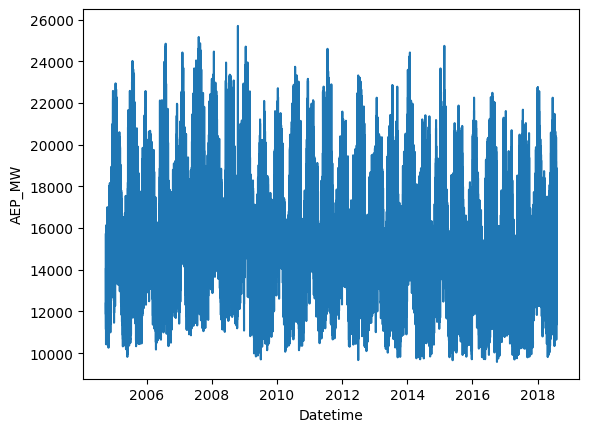

In [10]:
sns.lineplot(x=df['Datetime'],y=df['AEP_MW'])

In [11]:
from prophet import Prophet

In [12]:
model=Prophet()
df.columns=['ds','y']

In [13]:
model.fit(df)

01:21:13 - cmdstanpy - INFO - Chain [1] start processing
01:24:04 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future_data=model.make_future_dataframe(periods=365*3)

In [15]:
future_data.head()

,ds
0,2004-10-01 01:00:00
1,2004-10-01 02:00:00
2,2004-10-01 03:00:00
3,2004-10-01 04:00:00
4,2004-10-01 05:00:00


In [16]:
forecast=model.predict(future_data)

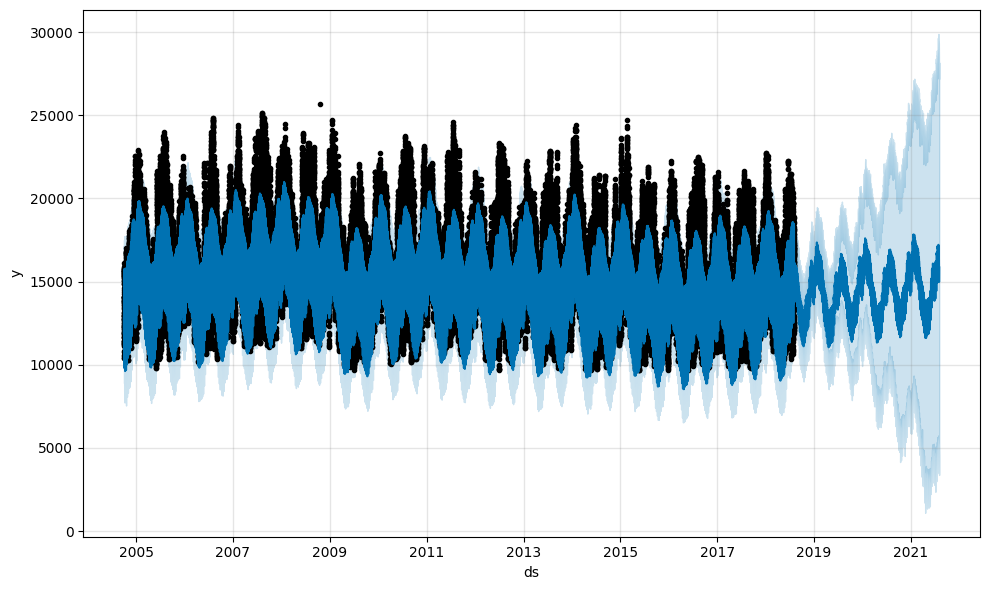

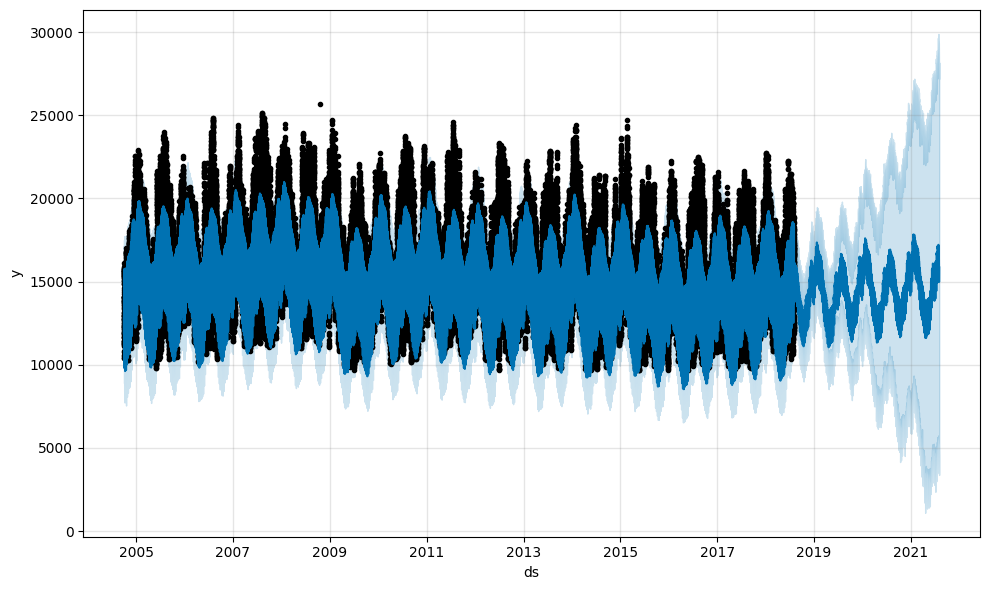

In [17]:
model.plot(forecast)

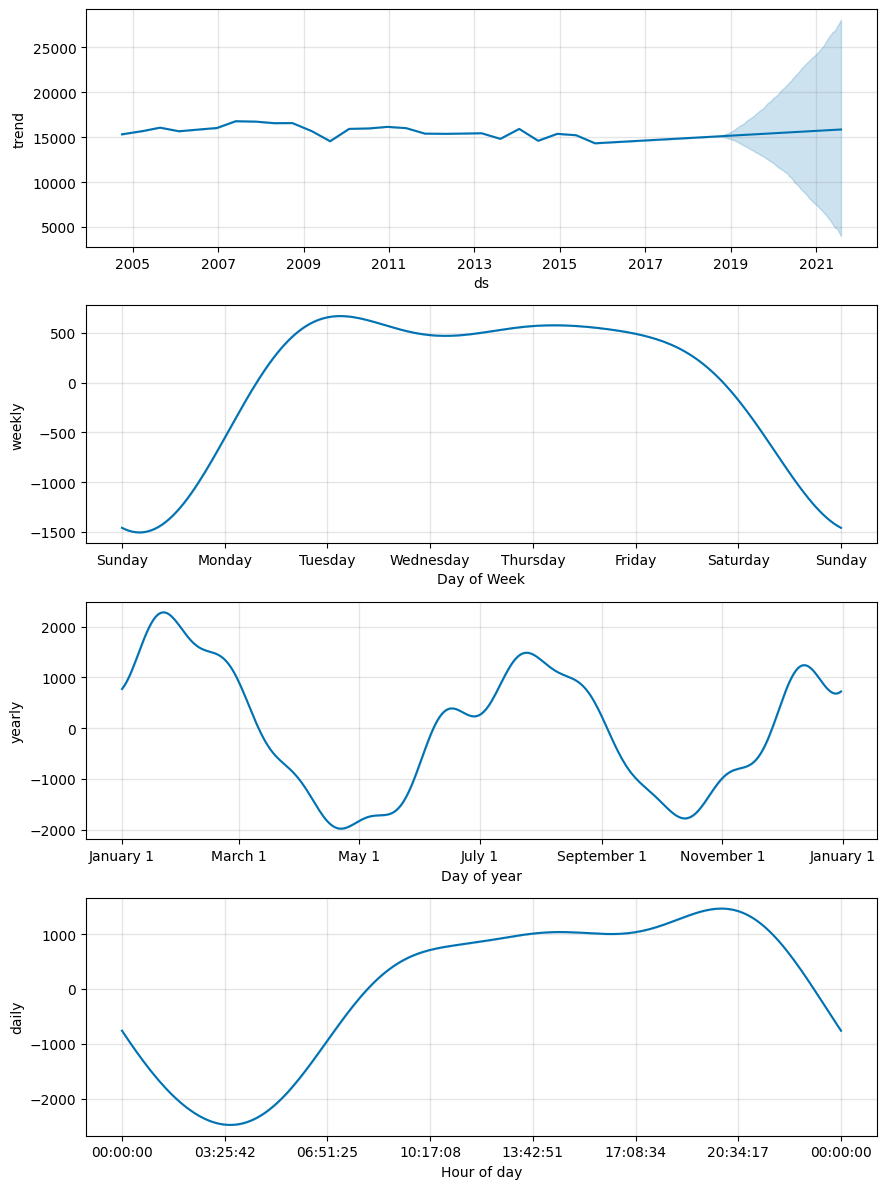

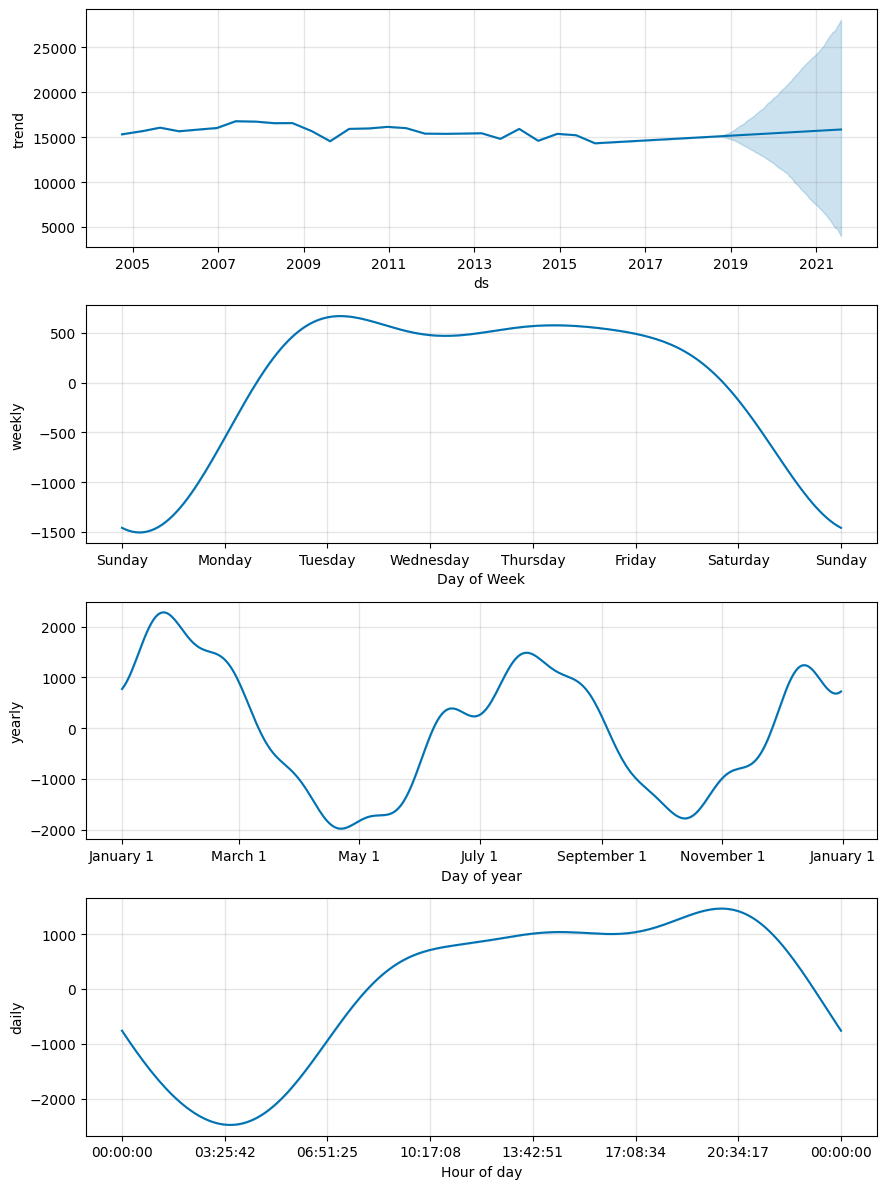

In [18]:
model.plot_components(forecast)